In [1]:
import numpy as np
import pandas as pd
import scipy.signal

In [6]:

out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/simData_Fr/DecoAdam/'
ts_base_dir='/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_rsfmri_ts/data/results/'
ts_file = ts_base_dir+sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'
ts_df = pd.read_pickle(ts_file)
ts = ts_df.values

def get_EI(sub, out_dir):
    train_E=np.loadtxt(out_dir+'HCP_'+sub+'sim_fitting_E_test.txt')
    train_I=np.loadtxt(out_dir+'HCP_'+sub+'sim_fitting_I_test.txt')

    test_E=np.loadtxt(out_dir+'HCP_'+sub+'sim_E_test.txt')
    test_I=np.loadtxt(out_dir+'HCP_'+sub+'sim_I_test.txt')
    return train_E, train_I, test_E, test_I

In [7]:
def plot_manifold_EI(sub, train_E, train_I, test_E, test_I, x_l, x_h, y_l, y_h):
    fig, ax=plt.subplots(1,2)
    ax[0].scatter(train_E.mean(1)[10:], train_I.mean(1)[10:], alpha=0.02)
    ax[0].set_xlim([x_l, x_h])
    ax[0].set_ylim([y_l, y_h])
    ax[1].scatter(test_E.mean(1)[50:], test_I.mean(1)[50:], alpha=0.01)
    ax[1].set_xlim([x_l, x_h])
    ax[1].set_ylim([y_l, y_h])
    plt.suptitle("Manifold of E and I: sub_"+ sub)
    plt.show()
    

In [8]:
import matplotlib.pyplot as plt

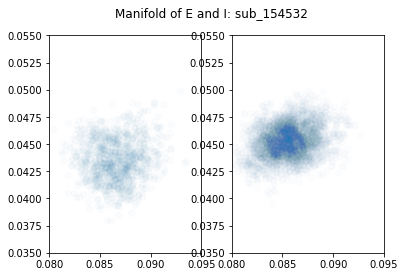

In [9]:
sub='154532'
x_l =0.08
x_h =0.095
y_l = 0.035
y_h=0.055
train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
plot_manifold_EI(sub, train_E, train_I, test_E, test_I, x_l, x_h, y_l, y_h)

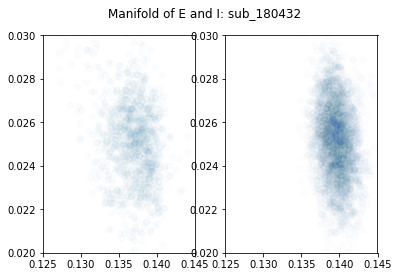

In [63]:
sub='180432'
x_l =0.125
x_h =0.145
y_l = 0.02
y_h=0.03
train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
plot_manifold_EI(sub, train_E, train_I, test_E, test_I, x_l, x_h, y_l, y_h)

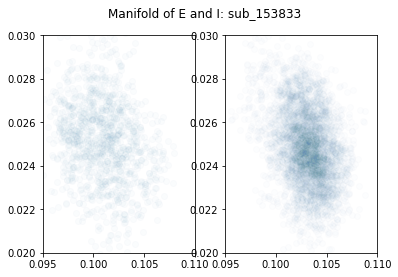

In [65]:
sub='153833'
x_l =0.095
x_h =0.11
y_l = 0.02
y_h=0.03
train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
plot_manifold_EI(sub, train_E, train_I, test_E, test_I, x_l, x_h, y_l, y_h)

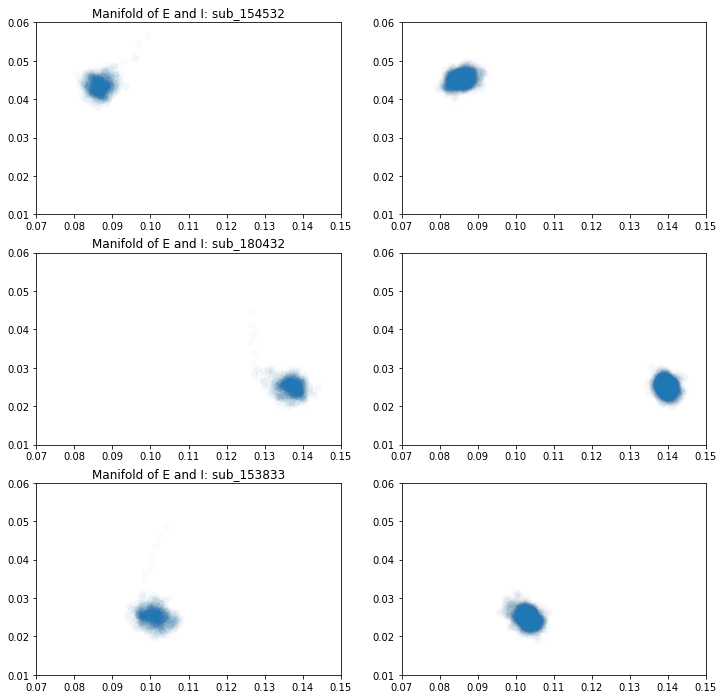

In [48]:
subs=['154532','180432','153833']
fig, ax=plt.subplots(3,2, figsize=(12,12))
i_n=0
for sub in subs:
    train_E=np.loadtxt(out_dir+'HCP_'+sub+'sim_fitting_E_test.txt')
    train_I=np.loadtxt(out_dir+'HCP_'+sub+'sim_fitting_I_test.txt')

    test_E=np.loadtxt(out_dir+'HCP_'+sub+'sim_E_test.txt')
    test_I=np.loadtxt(out_dir+'HCP_'+sub+'sim_I_test.txt')
    
    
    ax[i_n,0].scatter(train_E.mean(1)[10:], train_I.mean(1)[10:], alpha=0.02)
    ax[i_n, 0].set_xlim([0.07, 0.15])
    ax[i_n, 0].set_ylim([0.01, 0.06])
    
    ax[i_n,1].scatter(test_E.mean(1)[50:], test_I.mean(1)[50:], alpha=0.01)
    ax[i_n, 1].set_xlim([0.07, 0.15])
    ax[i_n, 1].set_ylim([0.01, 0.06])
    
    ax[i_n, 0].set_title("Manifold of E and I: sub_"+ sub)
    i_n += 1
plt.show()
    

In [10]:
from sklearn.cluster import KMeans

##### steps
step 1 get analytical signal
     E + Ij or get hilbert from empirical BOLD
step 2 at each ROI and each time-point
     get angle (phase) -pi to pi
step 3 at each time-point
     get cos similairty matrix
step 4 at each time-point
     svd to get 1st or 2nd eigenvector
step 5 put all the eigenvectors into a bad and cluster them using k-mean




In [142]:


def get_leads_ts(analytic_signal, n_ev):
    phase=np.angle(analytic_signal)
    #phase=np.unwrap(np.angle(analytic_signal))
    Leads = []
    for i in range(phase.shape[0]):
        FC_inst=np.cos(phase[i:i+1,:].T-phase[i:i+1,:])
        FC_inst=FC_inst.T
        w, v =np.linalg.eigh(FC_inst)
        print(w[-3:])
        Leads.append(v[:,-n_ev].ravel())
    return Leads
    

In [63]:

def leads_train(X, n_clusters):
    
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return labels, centers

In [143]:
sub='154532'
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/simData_Fr/DecoAdam/'
ts_base_dir='/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_rsfmri_ts/data/results/'
ts_file = ts_base_dir+sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'
ts_df = pd.read_pickle(ts_file)
ts = ts_df.values


train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
analytic_signal_trained = train_E +train_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_trained_2nd = get_leads_ts(analytic_signal_trained, 2)

[1.84442658e-14 6.46125620e+00 7.65387438e+01]
[2.33124916e-14 4.57681651e+00 7.84231835e+01]
[1.57743502e-14 3.74123046e+00 7.92587695e+01]
[1.42965397e-14 3.31528765e+00 7.96847124e+01]
[1.79829744e-14 2.99960371e+00 8.00003963e+01]
[2.21309955e-14 2.65415955e+00 8.03458404e+01]
[1.70951206e-14 2.40382184e+00 8.05961782e+01]
[2.57779587e-14 2.08339572e+00 8.09166043e+01]
[1.80092473e-14 2.02056113e+00 8.09794389e+01]
[1.91390702e-14 1.86833531e+00 8.11316647e+01]
[2.10965717e-14 1.77459880e+00 8.12254012e+01]
[1.93489980e-14 1.50235256e+00 8.14976474e+01]
[1.89917728e-14 1.78139019e+00 8.12186098e+01]
[2.11409932e-14 1.73875975e+00 8.12612402e+01]
[2.08147062e-14 1.45321081e+00 8.15467892e+01]
[2.97188450e-14 1.10075723e+00 8.18992428e+01]
[2.59561476e-14 1.10507072e+00 8.18949293e+01]
[2.28325958e-14 1.00574081e+00 8.19942592e+01]
[1.76898450e-14 1.28089212e+00 8.17191079e+01]
[2.32294361e-14 1.33479086e+00 8.16652091e+01]
[1.88696439e-14 1.30866390e+00 8.16913361e+01]
[1.76057168e-

[1.91900830e-14 2.61935870e+00 8.03806413e+01]
[1.81247960e-14 2.81171372e+00 8.01882863e+01]
[1.75372329e-14 2.35518620e+00 8.06448138e+01]
[2.85917116e-14 2.78419636e+00 8.02158036e+01]
[1.82148485e-14 2.28404001e+00 8.07159600e+01]
[1.82007219e-14 1.75533943e+00 8.12446606e+01]
[1.59726380e-14 1.69088826e+00 8.13091117e+01]
[1.55022776e-14 1.62684076e+00 8.13731592e+01]
[2.65956808e-14 1.98055852e+00 8.10194415e+01]
[1.75746426e-14 2.17964473e+00 8.08203553e+01]
[1.78491844e-14 2.07171916e+00 8.09282808e+01]
[2.13468919e-14 2.28105742e+00 8.07189426e+01]
[1.84760782e-14 2.52198256e+00 8.04780174e+01]
[2.11841362e-14 2.55029391e+00 8.04497061e+01]
[2.09233064e-14 2.74166761e+00 8.02583324e+01]
[2.02183157e-14 2.38255831e+00 8.06174417e+01]
[2.80666970e-14 2.50582254e+00 8.04941775e+01]
[1.94982600e-14 2.30735042e+00 8.06926496e+01]
[1.97627683e-14 2.10374215e+00 8.08962579e+01]
[1.79665659e-14 2.42010937e+00 8.05798906e+01]
[2.25908899e-14 2.32354446e+00 8.06764555e+01]
[2.03460076e-

[2.09678956e-14 1.31078319e+00 8.16892168e+01]
[1.60412632e-14 1.25975415e+00 8.17402459e+01]
[1.78212674e-14 1.43343273e+00 8.15665673e+01]
[2.64424419e-14 1.29131795e+00 8.17086820e+01]
[2.14772769e-14 1.40369052e+00 8.15963095e+01]
[2.35477146e-14 1.27155816e+00 8.17284418e+01]
[3.41186027e-14 1.41211008e+00 8.15878899e+01]
[1.94083313e-14 1.35917603e+00 8.16408240e+01]
[2.22415484e-14 1.52554065e+00 8.14744593e+01]
[2.07530843e-14 1.60875143e+00 8.13912486e+01]
[2.66625466e-14 1.34509585e+00 8.16549042e+01]
[1.73574855e-14 1.76456765e+00 8.12354324e+01]
[2.82387007e-14 1.31516511e+00 8.16848349e+01]
[2.13238879e-14 1.08585914e+00 8.19141409e+01]
[1.85004958e-14 1.14144729e+00 8.18585527e+01]
[2.13391720e-14 1.42592944e+00 8.15740706e+01]
[2.12058507e-14 1.58772441e+00 8.14122756e+01]
[1.55934923e-14 1.68681671e+00 8.13131833e+01]
[1.98289498e-14 1.37245537e+00 8.16275446e+01]
[1.72495473e-14 1.49756698e+00 8.15024330e+01]
[1.41603456e-14 1.29221218e+00 8.17077878e+01]
[2.89428890e-

[2.30651468e-14 1.91811023e+00 8.10818898e+01]
[1.93043040e-14 2.08019037e+00 8.09198096e+01]
[2.27322578e-14 1.87011825e+00 8.11298818e+01]
[3.06417018e-14 1.77439651e+00 8.12256035e+01]
[2.01379930e-14 1.93351791e+00 8.10664821e+01]
[1.80449698e-14 2.23625563e+00 8.07637444e+01]
[1.79653973e-14 2.07638539e+00 8.09236146e+01]
[1.45191122e-14 2.29481758e+00 8.07051824e+01]
[2.02632187e-14 1.51784313e+00 8.14821569e+01]
[2.71240498e-14 1.58644882e+00 8.14135512e+01]
[2.21561137e-14 9.11681857e-01 8.20883181e+01]
[1.97012346e-14 1.00371746e+00 8.19962825e+01]
[1.88647212e-14 1.21849429e+00 8.17815057e+01]
[1.90845139e-14 1.34428785e+00 8.16557121e+01]
[2.64210904e-14 1.34471176e+00 8.16552882e+01]
[2.28834847e-14 1.43834946e+00 8.15616505e+01]
[1.91639642e-14 1.51703072e+00 8.14829693e+01]
[1.65949254e-14 1.60215970e+00 8.13978403e+01]
[1.36906763e-14 1.95916649e+00 8.10408335e+01]
[1.62130787e-14 2.19155235e+00 8.08084476e+01]
[1.67272034e-14 1.70927771e+00 8.12907223e+01]
[1.86502166e-

[2.24128411e-14 1.97906329e+00 8.10209367e+01]
[3.01488141e-14 2.12029380e+00 8.08797062e+01]
[1.86861344e-14 2.47808568e+00 8.05219143e+01]
[3.03436021e-14 2.73074573e+00 8.02692543e+01]
[2.07829586e-14 2.33435384e+00 8.06656462e+01]
[2.60561125e-14 1.73433334e+00 8.12656667e+01]
[1.88084641e-14 1.96691152e+00 8.10330885e+01]
[2.02300862e-14 1.44303409e+00 8.15569659e+01]
[2.36181615e-14 1.30414549e+00 8.16958545e+01]
[2.32058565e-14 1.63105158e+00 8.13689484e+01]
[1.92048371e-14 1.81347344e+00 8.11865266e+01]
[2.37891157e-14 2.14287595e+00 8.08571241e+01]
[2.37410861e-14 1.93326028e+00 8.10667397e+01]
[2.21226689e-14 1.57562026e+00 8.14243797e+01]
[1.86183813e-14 1.67016694e+00 8.13298331e+01]
[2.30208468e-14 1.84021541e+00 8.11597846e+01]
[2.55397353e-14 1.57298301e+00 8.14270170e+01]
[1.79074205e-14 1.67328307e+00 8.13267169e+01]
[2.65435036e-14 1.92839789e+00 8.10716021e+01]
[1.66711545e-14 1.89347362e+00 8.11065264e+01]
[2.02332956e-14 1.80633363e+00 8.11936664e+01]
[3.00864045e-

[1.49996536e-14 2.06080421e+00 8.09391958e+01]
[1.60516217e-14 2.08728760e+00 8.09127124e+01]
[2.06796119e-14 1.68316244e+00 8.13168376e+01]
[1.53622169e-14 2.08497202e+00 8.09150280e+01]
[3.01336022e-14 2.30252519e+00 8.06974748e+01]
[1.92651439e-14 1.52909144e+00 8.14709086e+01]
[1.55209501e-14 1.55034268e+00 8.14496573e+01]
[2.20592949e-14 1.47325644e+00 8.15267436e+01]
[2.22368500e-14 1.96471816e+00 8.10352818e+01]
[2.13052461e-14 1.90905480e+00 8.10909452e+01]
[1.72888014e-14 2.43774795e+00 8.05622521e+01]
[2.56069324e-14 2.10615007e+00 8.08938499e+01]
[2.75112009e-14 1.79976916e+00 8.12002308e+01]
[1.76911311e-14 1.63390212e+00 8.13660979e+01]
[2.85032146e-14 1.87927722e+00 8.11207228e+01]
[2.38358512e-14 2.06513073e+00 8.09348693e+01]
[1.67336350e-14 1.96143553e+00 8.10385645e+01]
[2.38616298e-14 1.82606149e+00 8.11739385e+01]
[2.47859975e-14 1.50821102e+00 8.14917890e+01]
[2.09606085e-14 1.28046204e+00 8.17195380e+01]
[2.70089070e-14 1.19990679e+00 8.18000932e+01]
[2.46123811e-

[2.03819270e-14 2.10723520e+00 8.08927648e+01]
[1.67890917e-14 2.45850815e+00 8.05414919e+01]
[2.16460025e-14 2.44749494e+00 8.05525051e+01]
[1.57366068e-14 2.47683262e+00 8.05231674e+01]
[2.13922660e-14 1.84649327e+00 8.11535067e+01]
[1.94427862e-14 1.81007863e+00 8.11899214e+01]
[2.21343606e-14 2.05289057e+00 8.09471094e+01]
[1.84233616e-14 2.54248574e+00 8.04575143e+01]
[1.93747164e-14 2.68045613e+00 8.03195439e+01]
[1.71445611e-14 2.50757229e+00 8.04924277e+01]
[1.76255805e-14 2.47538449e+00 8.05246155e+01]
[1.54817042e-14 2.31395628e+00 8.06860437e+01]
[1.87005084e-14 2.66097644e+00 8.03390236e+01]
[1.82257913e-14 2.32570719e+00 8.06742928e+01]
[2.21231579e-14 2.20441498e+00 8.07955850e+01]
[1.45871412e-14 2.71945998e+00 8.02805400e+01]
[1.76910115e-14 2.83007866e+00 8.01699213e+01]
[1.54706864e-14 2.56010020e+00 8.04398998e+01]
[1.74231217e-14 2.27096627e+00 8.07290337e+01]
[1.86713953e-14 2.20981035e+00 8.07901896e+01]
[2.48553770e-14 2.03328261e+00 8.09667174e+01]
[1.80671525e-

In [64]:
### cluster using the 2nd eigenvector

sub='154532'
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/simData_Fr/DecoAdam/'
ts_base_dir='/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_rsfmri_ts/data/results/'
ts_file = ts_base_dir+sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'
ts_df = pd.read_pickle(ts_file)
ts = ts_df.values
analytic_signal_exp = scipy.signal.hilbert(ts,axis=0)

Leads_exp = get_leads_ts(analytic_signal_exp, 1)

X_exp = np.array(Leads_exp)
labels_exp, centers_exp= leads_train(X_exp, 3)

train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
analytic_signal_trained = train_E +train_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_trained_2nd = get_leads_ts(analytic_signal_trained, 2)

X_trained_2nd = np.array(Leads_trained_2nd)
labels_trained_2nd, centers_trained_2nd = leads_train(X_trained_2nd, 3)

analytic_signal_test= test_E +test_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_test_2nd = get_leads_ts(analytic_signal_test, 2)

X_test_2nd = np.array(Leads_test_2nd)
labels_test_2nd, centers_test_2nd = leads_train(X_test_2nd, 3)


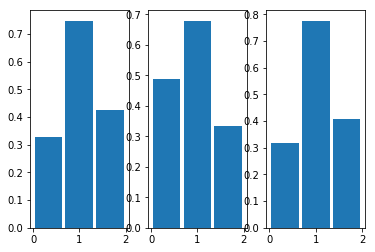

In [65]:
#### histogram of clusters

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3)
ax[0].hist(labels_trained_2nd,bins=3, rwidth=0.9, density=True)
ax[1].hist(labels_exp, bins =3, rwidth=0.9, density=True)
ax[2].hist(labels_test_2nd, bins =3, rwidth=0.9, density=True)
plt.show()

In [66]:
np.corrcoef(np.vstack((centers_exp,centers_trained_2nd)))[:3,:][:,3:]

array([[ 0.38248048, -0.57421744,  0.37081585],
       [-0.53285978,  0.54063861, -0.56890224],
       [-0.23531035,  0.13429973, -0.10724342]])

In [67]:
np.corrcoef(np.vstack((centers_test_2nd,centers_trained_2nd)))[:3,:][:,3:]

array([[-0.55198983,  0.90793687, -0.88510587],
       [ 0.80959552, -0.84606318,  0.86164115],
       [-0.71207782,  0.72378971, -0.47866013]])

In [68]:
np.corrcoef(np.vstack((centers_exp,centers_test_2nd)))[:3,:][:,3:]

array([[-0.47216335,  0.46355451, -0.67919658],
       [ 0.4902358 , -0.71139758,  0.67988383],
       [ 0.07003343, -0.17996788,  0.13487328]])

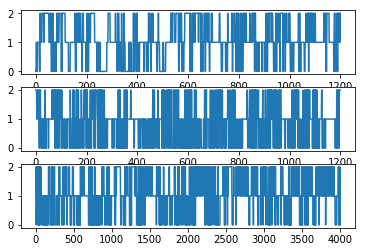

In [69]:
#### time series of clusters


fig, ax = plt.subplots(3,1)
ax[0].plot(labels_trained_2nd)
ax[1].plot(labels_exp)
ax[2].plot(labels_test_2nd)
plt.show()

In [70]:
centers_test_2nd[0]

array([ 0.06623343, -0.01949356,  0.03772009,  0.00138406, -0.02568633,
       -0.02796944, -0.02076839, -0.01154414, -0.01011188, -0.04079349,
       -0.02008171,  0.02972263,  0.01044962, -0.00291758, -0.01566199,
       -0.01110127, -0.02513324, -0.00983649, -0.02239059, -0.01746186,
       -0.01067364, -0.02678172, -0.02790039, -0.01476525, -0.02940081,
        0.01542789,  0.03490655,  0.00271338, -0.00679194, -0.02294215,
       -0.01982986, -0.0098035 ,  0.05371588, -0.02788894, -0.00894671,
        0.00828869, -0.033727  ,  0.07944278,  0.0594332 ,  0.02480005,
        0.02284718,  0.00937755, -0.00599102,  0.0117136 ,  0.0386679 ,
       -0.02251891, -0.01829692, -0.02409864, -0.032593  , -0.00559298,
       -0.03078474, -0.01947433,  0.03653767,  0.01496336,  0.03458131,
        0.00183471, -0.03811274, -0.02579799, -0.03420992, -0.03721635,
       -0.03506546, -0.0336479 , -0.03981152, -0.03016328, -0.0312997 ,
       -0.03369311,  0.0271299 ,  0.041985  ,  0.0436563 , -0.03

In [71]:
centers_test_2nd[1]

array([ 0.0775649 ,  0.00570197, -0.04148433, -0.02143206,  0.02869701,
        0.01434588,  0.01202217,  0.02111692,  0.008964  ,  0.0224896 ,
        0.01881292, -0.02054622, -0.01484139, -0.00914114,  0.00044341,
        0.01632187,  0.01630214,  0.02259611,  0.01956405,  0.01539311,
        0.01647068,  0.01423101,  0.03088503,  0.02112637,  0.0216015 ,
       -0.0252273 , -0.05095336, -0.03095449,  0.01199774,  0.01044234,
        0.01672981,  0.02575613, -0.10582731,  0.03262889,  0.02270566,
       -0.01992861,  0.02510818, -0.1148412 , -0.07006996, -0.01752721,
       -0.03262157, -0.02143825, -0.00126075, -0.0507507 , -0.03136535,
        0.01223516,  0.02320728,  0.01896544,  0.0196825 ,  0.01818002,
        0.03468844,  0.01812029, -0.03250299, -0.0055386 , -0.02881345,
       -0.01476746,  0.02622717,  0.03227056,  0.03096893,  0.02903864,
        0.03641484,  0.02706539,  0.02728736,  0.02481443,  0.02129388,
        0.03122144, -0.02872192, -0.05095446, -0.05062553,  0.03

In [72]:
centers_test_2nd[2]

array([ 0.08274251,  0.02035252,  0.03667634,  0.02938594, -0.02917634,
       -0.01440146, -0.00488442, -0.02379361, -0.03179941, -0.02461044,
       -0.02425654,  0.00529686,  0.00119017, -0.00057484,  0.00180322,
       -0.02666285, -0.0257166 , -0.03547237, -0.018796  , -0.02069504,
       -0.02293226, -0.02076574, -0.02344693, -0.0286124 , -0.0218846 ,
        0.00918455,  0.05128472,  0.03709489, -0.01930676, -0.00659174,
        0.00212791, -0.02305325,  0.13252913, -0.02700032, -0.02839062,
        0.0262398 , -0.01790178,  0.10171242,  0.06497239,  0.0412052 ,
        0.0151229 ,  0.02185282, -0.01053076,  0.05299111,  0.02768358,
       -0.00935235, -0.03419282, -0.03516684, -0.02876896, -0.0218413 ,
       -0.02318101, -0.02204948,  0.02261644,  0.02275136,  0.06004218,
        0.03728034, -0.03320626, -0.02462497, -0.03535708, -0.03894116,
       -0.02780347, -0.01987681, -0.02482547, -0.02533328, -0.02552666,
       -0.02510737,  0.0421909 ,  0.03403797,  0.06256809, -0.03

In [73]:
### cluster using the first eigenvector 

sub='154532'
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/simData_Fr/DecoAdam/'
ts_base_dir='/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_rsfmri_ts/data/results/'
ts_file = ts_base_dir+sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'
ts_df = pd.read_pickle(ts_file)
ts = ts_df.values
analytic_signal_exp = scipy.signal.hilbert(ts,axis=0)

Leads_exp = get_leads_ts(analytic_signal_exp, 1)

X_exp = np.array(Leads_exp)
labels_sim, centers_sim = leads_train(X_exp, 3)

train_E, train_I, test_E, test_I = get_EI(sub, out_dir)
analytic_signal_trained = train_E +train_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_trained = get_leads_ts(analytic_signal_trained, 1)

X_trained = np.array(Leads_trained)
labels_trained, centers_trained = leads_train(X_trained, 3)

analytic_signal_test= test_E +test_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_test = get_leads_ts(analytic_signal_test, 1)

X_test = np.array(Leads_test)
labels_test, centers_test = leads_train(X_test, 3)


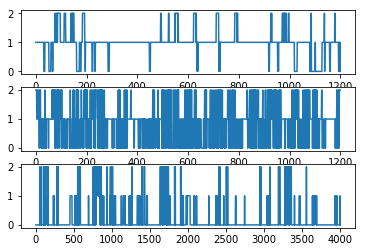

In [74]:
#### time series of clusters


fig, ax = plt.subplots(3,1)
ax[0].plot(labels_trained)
ax[1].plot(labels_exp)
ax[2].plot(labels_test)
plt.show()

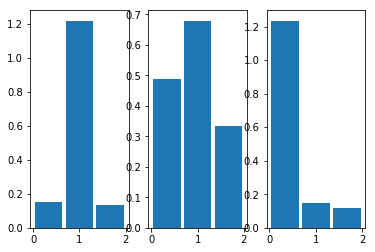

In [75]:
#### histogram of clusters

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3)
ax[0].hist(labels_trained,bins=3, rwidth=0.9, density=True)
ax[1].hist(labels_exp, bins =3, rwidth=0.9, density=True)
ax[2].hist(labels_test, bins =3, rwidth=0.9, density=True)
plt.show()

In [76]:
np.corrcoef(np.vstack((centers_test,centers_trained)))[:3,:][:,3:]

array([[0.43975042, 0.9453989 , 0.45226563],
       [0.23996086, 0.51274641, 0.99076603],
       [0.98690515, 0.65938784, 0.19418253]])

In [77]:
centers_test[0]

array([-0.10995948, -0.10988689, -0.10925156, -0.10953025, -0.11008043,
       -0.11015295, -0.1101462 , -0.11018928, -0.1101131 , -0.11015583,
       -0.1101179 , -0.1095818 , -0.1096851 , -0.10986598, -0.10990856,
       -0.11014614, -0.11018224, -0.11005992, -0.11014878, -0.11019087,
       -0.11021232, -0.11004158, -0.11010083, -0.11008194, -0.11002225,
       -0.10939795, -0.10901486, -0.10947539, -0.10995828, -0.11013885,
       -0.1101334 , -0.11002077, -0.10707512, -0.11000089, -0.11012538,
       -0.10915566, -0.11004046, -0.10666408, -0.10871747, -0.10964027,
       -0.10907329, -0.10971727, -0.11000839, -0.10905582, -0.10939314,
       -0.11018054, -0.11016196, -0.11015873, -0.11024174, -0.11021732,
       -0.1101164 , -0.11009556, -0.10927642, -0.1097483 , -0.10950359,
       -0.10977009, -0.1100902 , -0.11007725, -0.11008728, -0.11017136,
       -0.11010555, -0.11024353, -0.11011482, -0.11017829, -0.11012758,
       -0.11008851, -0.10949667, -0.10935674, -0.10928561, -0.11

In [78]:
centers_test[1]

array([-0.11054793, -0.11031584, -0.10895474, -0.10996735, -0.11030028,
       -0.11059614, -0.11049275, -0.11028732, -0.1104105 , -0.110389  ,
       -0.1103823 , -0.10967085, -0.10995848, -0.11030448, -0.11015575,
       -0.1103823 , -0.11052573, -0.11046457, -0.11050592, -0.11039315,
       -0.11055448, -0.11038902, -0.11051967, -0.11056969, -0.1103074 ,
       -0.1097132 , -0.10871661, -0.10999106, -0.11041495, -0.11040878,
       -0.11039013, -0.11026588, -0.10781355, -0.11038539, -0.11029487,
       -0.10967828, -0.11000074, -0.10646713, -0.10912704, -0.10991163,
       -0.109128  , -0.10977371, -0.11018697, -0.10914863, -0.10980531,
       -0.1103138 , -0.11063436, -0.11040431, -0.11020251, -0.11038288,
       -0.11034135, -0.1105462 , -0.10940334, -0.11022385, -0.10946991,
       -0.11012634, -0.11032378, -0.11043533, -0.11025852, -0.11047874,
       -0.11035386, -0.11047255, -0.11038096, -0.11047691, -0.11028759,
       -0.11049227, -0.10932802, -0.10956617, -0.10978894, -0.11

In [79]:
centers_test[2]

array([-0.11045872, -0.11017788, -0.10856687, -0.10988191, -0.11044036,
       -0.11033317, -0.11062852, -0.11062427, -0.11059227, -0.11062986,
       -0.11052369, -0.11011938, -0.11016863, -0.11019357, -0.11032415,
       -0.11059079, -0.1103293 , -0.11053869, -0.11064064, -0.11040157,
       -0.11056292, -0.11049195, -0.11051317, -0.11061302, -0.11054643,
       -0.11021296, -0.10940978, -0.10973355, -0.11043847, -0.11047079,
       -0.11038027, -0.1103684 , -0.10358161, -0.11046296, -0.11049027,
       -0.10922236, -0.11034938, -0.10747352, -0.10871635, -0.11008094,
       -0.10924274, -0.11016573, -0.1103219 , -0.10951012, -0.11011949,
       -0.11038075, -0.11051744, -0.11062165, -0.11034218, -0.11062598,
       -0.11022726, -0.11035054, -0.10956445, -0.1103695 , -0.11013314,
       -0.11041852, -0.11035957, -0.10986628, -0.11019207, -0.1104611 ,
       -0.11062572, -0.11072203, -0.1104731 , -0.11046675, -0.11038585,
       -0.11056802, -0.10933839, -0.10981255, -0.10997114, -0.11

In [99]:
#### comparison between subjects
sub='154532'
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/simData_Fr/DecoAdam/'

train_E_1, train_I_1, test_E_1, test_I_1 = get_EI(sub, out_dir)

sub='180432'
train_E_2, train_I_2, test_E_2, test_I_2 = get_EI(sub, out_dir)

test_E= np.vstack((test_E_1, test_E_2))
test_I= np.vstack((test_I_1, test_I_2))


"""sub='180432'
train_E, train_I, test_E, test_I = get_EI(sub, out_dir)"""

analytic_signal_test= test_E +test_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_test = get_leads_ts(analytic_signal_test, 2)

X_test = np.array(Leads_test)
labels_test, centers_test = leads_train(X_test, 5)


In [100]:
test_E.shape

(8000, 83)

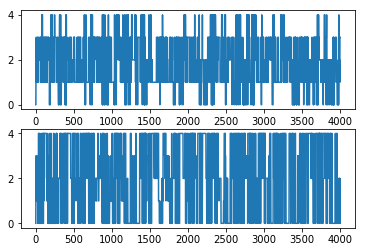

In [101]:
#### time series of clusters


fig, ax = plt.subplots(2,1)
ax[0].plot(labels_test[:4000])
ax[1].plot(labels_test[4000:])
plt.show()

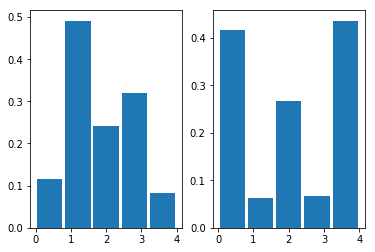

In [103]:
#### histogram of clusters

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].hist(labels_test[:4000],bins=5, rwidth=0.9, density=True)
ax[1].hist(labels_test[4000:], bins =5, rwidth=0.9, density=True)
plt.show()

In [107]:
train_E= np.vstack((train_E_1, train_E_2))
train_I= np.vstack((train_I_1, train_I_2))


"""sub='180432'
train_E, train_I, test_E, test_I = get_EI(sub, out_dir)"""

analytic_signal_train= train_E +train_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_train = get_leads_ts(analytic_signal_train, 1)

X_train = np.array(Leads_train)
labels_train, centers_train = leads_train(X_train, 5)

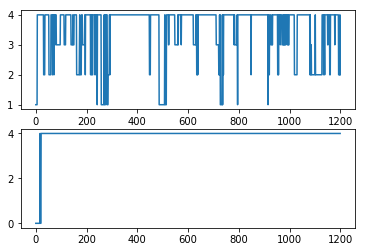

In [108]:
#### time series of clusters


fig, ax = plt.subplots(2,1)
ax[0].plot(labels_train[:1200])
ax[1].plot(labels_train[1200:])
plt.show()

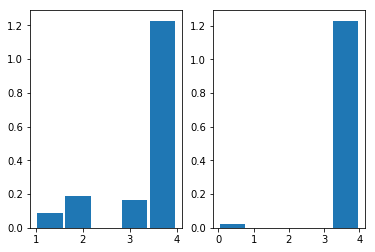

In [109]:
#### histogram of clusters

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].hist(labels_train[:1200],bins=5, rwidth=0.9, density=True)
ax[1].hist(labels_train[1200:], bins =5, rwidth=0.9, density=True)
plt.show()

In [111]:
import os

In [119]:
sc_base_dir = '/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_tracks_conmats/data/results/hcp_wuminn/tractography/dipy/l2k8/'
ts_base_dir='/gerda/mcintosh_lab/jgriffiths/hcp_wuminn_l2k8_rsfmri_ts/data/results/'


subIDs_list = subs=[sub for sub in os.listdir(sc_base_dir) if os.path.isdir(sc_base_dir+sub)]


In [120]:
train_E=[]
train_I=[]
for i in range(len(subIDs_list)):
    sub =subIDs_list[i]
    print(i, sub)
    sc_file = sc_base_dir+sub+'/dsi_sd4/sub-'+sub+'_roisc33dwispace/weights.txt'
    ts_file = ts_base_dir+sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'
    if os.path.isfile(sc_file) and os.path.isfile(ts_file):
        train_E_sub, train_I_sub, test_E_sub, test_I_sub = get_EI(sub, out_dir)
        train_E.append(train_E_sub)
        train_I.append(train_I_sub)
train_E = np.concatenate(train_E, axis=0)
train_I = np.concatenate(train_I, axis=0)
        


0 156233
1 209329
2 154532
3 172332
4 181131
5 317332
6 196750
7 196144
8 231928
9 579867
10 146432
11 148941
12 100307
13 709551
14 155938
15 198451
16 311320
17 385450
18 173637
19 181636
20 290136
21 198653
22 157336
23 121921
24 145127
25 567961
26 492754
27 562446
28 200210
29 151223
30 872158
31 579665
32 548250
33 198350
34 297655
35 295146
36 561444
37 183337
38 559053
39 519950
40 220721
41 197550
42 179952
43 151526
44 191033
45 177342
46 156536
47 298051
48 570243
49 154229
50 512835
51 257542
52 529549
53 173738
54 214423
55 177746
56 171532
57 480141
58 285446
59 176441
60 280941
61 115017
62 156435
63 965771
64 448347
65 173233
66 173536
67 904044
68 175035
69 150928
70 316835
71 211215
72 171633
73 305830
74 926862
75 547046
76 154936
77 127327
78 318637
79 158338
80 910241
81 191336
82 286650
83 753251
84 486759
85 153025
86 200008
87 803240
88 156637
89 149842
90 159744
91 299154
92 957974
93 671855
94 173940
95 465852
96 150423
97 599469
98 199251
99 816653
100 158843

In [122]:
np.savetxt(out_dir+'HCP_alltrain_E.txt', train_E)
np.savetxt(out_dir+'HCP_alltrain_I.txt', train_I)

In [123]:
analytic_signal_train= train_E +train_I*1j#scipy.signal.hilbert(ts,axis=0)
Leads_train = get_leads_ts(analytic_signal_train, 1)

X_train = np.array(Leads_train)
labels_train, centers_train = leads_train(X_train, 5)

np.savetxt(out_dir+'HCP_alllabels.txt', labels_train)

In [132]:
np.savetxt(out_dir+'HCP_1st_evs.txt', X_train)

In [129]:
labels_train, centers_train = leads_train(X_train, 10)

np.savetxt(out_dir+'HCP_alllabels_10.txt', labels_train)

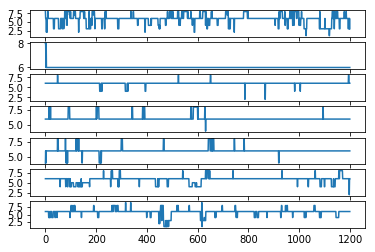

In [131]:
#### time series of clusters


fig, ax = plt.subplots(7,1)
ax[0].plot(labels_train[:1200])
ax[1].plot(labels_train[1200:2*1200])
ax[2].plot(labels_train[2*1200:3*1200])
ax[3].plot(labels_train[3*1200:4*1200])
ax[4].plot(labels_train[4*1200:5*1200])
ax[5].plot(labels_train[5*1200:6*1200])
ax[6].plot(labels_train[6*1200:7*1200])
plt.show()

In [137]:
Leads_train = get_leads_ts(analytic_signal_train, 2)
X_train = np.array(Leads_train)

labels_train, centers_train = leads_train(X_train, 5)

np.savetxt(out_dir+'HCP_alllabels_5c_2ndev.txt', labels_train)
np.savetxt(out_dir+'HCP_2nd_evs.txt', X_train)

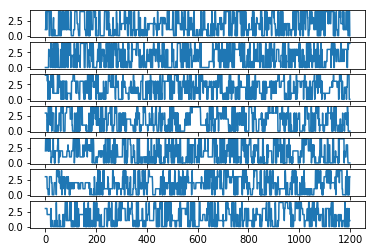

In [138]:
#### time series of clusters


fig, ax = plt.subplots(7,1)
ax[0].plot(labels_train[:1200])
ax[1].plot(labels_train[1200:2*1200])
ax[2].plot(labels_train[2*1200:3*1200])
ax[3].plot(labels_train[3*1200:4*1200])
ax[4].plot(labels_train[4*1200:5*1200])
ax[5].plot(labels_train[5*1200:6*1200])
ax[6].plot(labels_train[6*1200:7*1200])
plt.show()

In [139]:
labels_train, centers_train = leads_train(X_train, 10)

np.savetxt(out_dir+'HCP_alllabels_10c_2ndev.txt', labels_train)

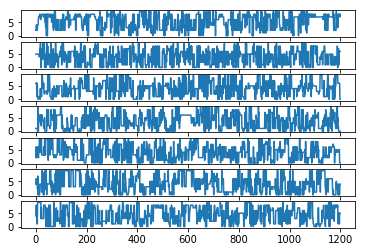

In [140]:
#### time series of clusters


fig, ax = plt.subplots(7,1)
ax[0].plot(labels_train[:1200])
ax[1].plot(labels_train[1200:2*1200])
ax[2].plot(labels_train[2*1200:3*1200])
ax[3].plot(labels_train[3*1200:4*1200])
ax[4].plot(labels_train[4*1200:5*1200])
ax[5].plot(labels_train[5*1200:6*1200])
ax[6].plot(labels_train[6*1200:7*1200])
plt.show()

In [ ]:
a